In [168]:
import os
import numpy as np
import random
import pandas as pd
from sklearn.datasets import samples_generator as gen
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [240]:
features = {
    'body shape': ['humanoid', 'unknown' ],
    'main color': ['red', 'blue', 'green', 'brown', 'gray', 'yellow', 'purple', 'white', 'black'],
    'accessory 1': ['cape', 'hammer', 'shield', 'mask', 'net', 'nothing'],
    'accessory 2': ['cape', 'hammer', 'shield', 'mask', 'net', 'nothing'],
    'height': (1, 10)
}

feature_indices = { k: i for i, (k, v) in enumerate(features.items()) }

labels = ['Superman', 'Thor', 'Batman', 'Iron Man', 'Spiderman', 'Groot', 'Captain America', 'Hulk']

In [270]:
def plot_data(data, label, **kwargs):
    for i in set(label):
        x, y = zip(*[x for x, y in zip(data, label) if y == i])
        plt.scatter(x, y, color='C{}'.format(i), **kwargs)   

## Generating training data

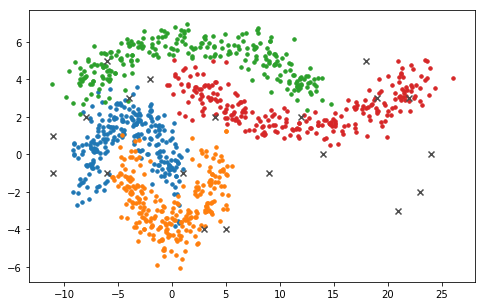

In [271]:
N = 500
T = 20

x1, y1 = gen.make_moons(n_samples=N, noise=0.2)
x2, y2 = gen.make_moons(n_samples=N, noise=0.15)
#x3, y3 = gen.make_blobs(n_samples=N, centers=4, center_box=(-5, 5))
y2 += 2
x1 = (x1 - (1, 0.5)) * 4
x2 = (x2 + (0.2, 1)) * (10, 3)
data = np.concatenate((x1, x2))
label = np.concatenate((y1, y2))
bounds = min(data[:,0]), max(data[:,0]), min(data[:,1]), max(data[:,1])
test = np.array(list(zip(np.random.randint(bounds[0], bounds[1], T),
                         np.random.randint(bounds[2], bounds[3], T))))

plot_data(data, label, s=12)
                      
plt.scatter(test[:,0], test[:,1], color='0.3', marker='x')    
plt.gcf().set_size_inches(8, 5)
plt.show()

## Train the models

In [275]:
classifiers = [
    DecisionTreeClassifier(),
    DecisionTreeClassifier(criterion='entropy'),
    RandomForestClassifier(n_estimators=1),
    RandomForestClassifier(n_estimators=10),
    RandomForestClassifier(n_estimators=100),
    RandomForestClassifier(n_estimators=300),
]

for c in classifiers:
    c.fit(data, label)

## Test the models

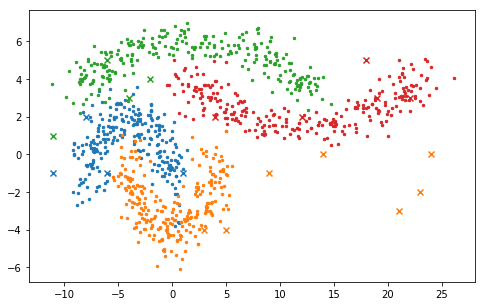

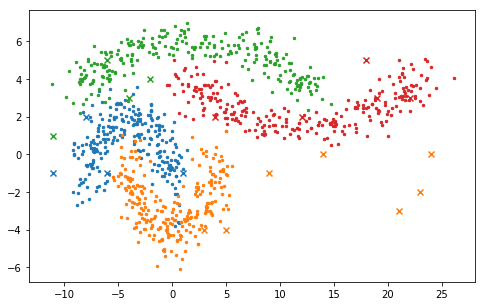

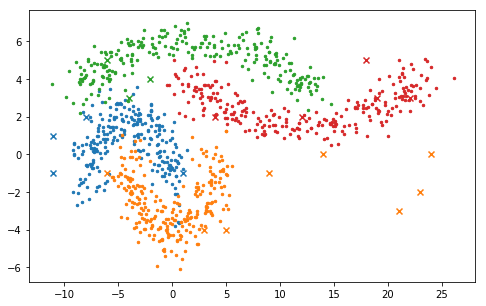

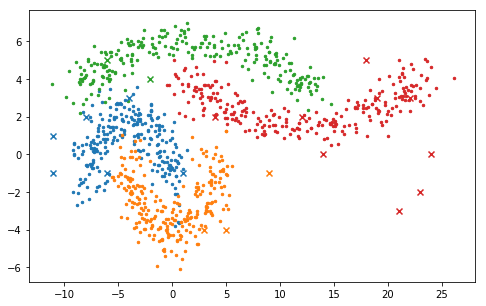

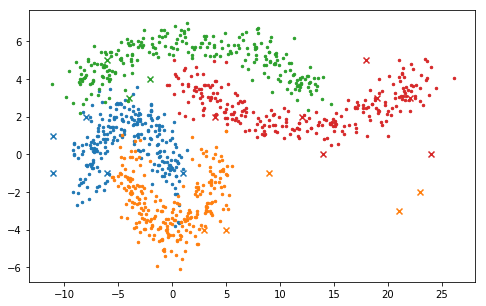

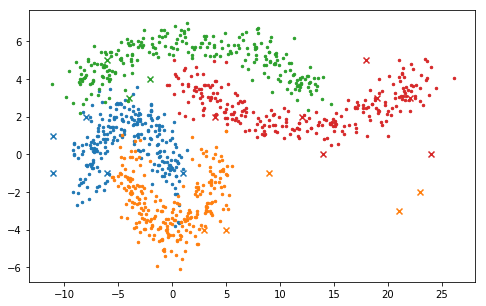

In [276]:
for c in classifiers:
    res = c.predict(test)
    plot_data(data, label, s=6)
    plot_data(test, res, marker='x')

    plt.gcf().set_size_inches(8, 5)
    plt.show()